## Ví dụ 1: 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# randomly generate data
N = 500 # number of training sample
d = 2 # data dimension
C = 3 # number of classes (for c = 0, 1, 2)
means = [[2, 2], [8, 3], [3, 6]] # centeroid of each class dataset
cov = [[1, 0], [0, 1]]
# generate 3 classes of datasets
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
# each column is a datapoint (arrange 3 vectors X1 X2 X3 then transpose matrix)
X = np.concatenate((X0, X1, X2), axis = 0).T
# extended data by add row ONES (equivalent to 1) at first place
X = np.concatenate((np.ones((1, 3*N)), X), axis = 0)

# Generate label for data points of each class (0, 1, 2)
# with first 500 will belong to class 0, second 500 => 1 and last 500=> class 2
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

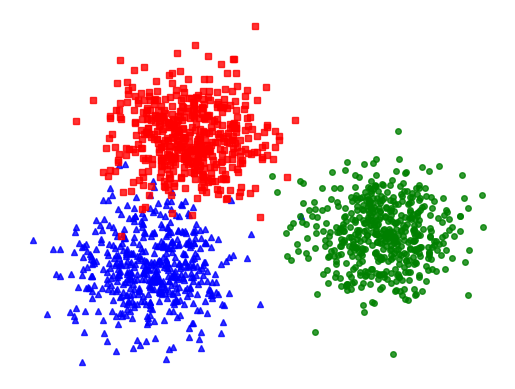

In [3]:
def display(X, label):
    X0 = X[:, label == 0]
    X1 = X[:, label == 1]
    X2 = X[:, label == 2]
    plt.plot(X0[0, :], X0[1,:], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[0, :], X1[1,:], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[0, :], X2[1,:], 'rs', markersize = 4, alpha = .8)
    plt.axis('off')
    plt.plot()
    plt.show()
    
display(X[1:, :], original_label)

In [4]:
from scipy import sparse
def convert_labels(y, C = C):
    """
    convert 1d label to a matrix label: each column of this
    matrix coresponding to 1 element in y. In i-th column of Y,
    only one non-zeros element located in the y[i]-th position,
    and = 1 ex: y = [0, 2, 1, 0], and 3 classes then return

    [[1, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 1, 0, 0]]
    """
    Y = sparse.coo_matrix((np.ones_like(y),
    (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

# Y = convert_labels(y, C)

In [6]:
def softmax_stable(Z):
    """
    Compute softmax values for each sets of scores in Z.
    each column of Z is a set of score.
    """
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A
def softmax(Z):
    """
    #Compute softmax values for each sets of scores in V.
    #each column of V is a set of score.
    """
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 0)
    return A
def softmax_regression(X, y, W_init, eta, tol = 1e-4, max_count = 10000):
    W = [W_init]
    C = W_init.shape[1]
    Y = convert_labels(y, C)
    it = 0
    N = X.shape[1]
    d = X.shape[0]

    count = 0
    check_w_after = 20
    while count < max_count:
    # mix data
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)
            ai = softmax(np.dot(W[-1].T, xi))
            W_new = W[-1] + eta*xi.dot((yi - ai).T)
            count += 1
            # stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(W_new - W[-check_w_after]) < tol:
                    return W
            W.append(W_new)
    return W
# cost or loss function
def cost(X, Y, W):
    A = softmax(W.T.dot(X))
    return -np.sum(Y*np.log(A))

# Predict that X belong to which class (1..C now indexed as 0..C-1 )
def pred(W, X):
    """
    predict output of each columns of X
    Class of each x_i is determined by location of max probability
    Note that class are indexed by [0, 1, 2, ...., C-1]
    """
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis = 0)

# W[-1] is the solution, W is all history of weights

In [7]:
eta = .05
d = X.shape[0]
W_init = np.random.randn(X.shape[0], C)
W = softmax_regression(X, original_label, W_init, eta)
print(W[-1])

[[ 9.2680904  -2.40628758 -2.98009702]
 [ 0.12374008  2.77794677  0.30111754]
 [-1.62919804 -1.33966459  1.56826864]]


In [8]:
#Visualize
xm = np.arange(-2, 11, 0.025)
xlen = len(xm)
ym = np.arange(-3, 10, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)
print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)
XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)
print(XX.shape)
Z = pred(W[-1], XX)
Z = Z.reshape(xx.shape)

(1, 270400)
(3, 270400)


In [9]:
#Visualize
xm = np.arange(-2, 11, 0.025)
xlen = len(xm)
ym = np.arange(-3, 10, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)
print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)
XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)
print(XX.shape)
Z = pred(W[-1], XX)
Z = Z.reshape(xx.shape)

(1, 270400)
(3, 270400)


## Ví dụ 2: 

In [5]:
from sklearn.decomposition import PCA as sklearnPCA
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import sparse

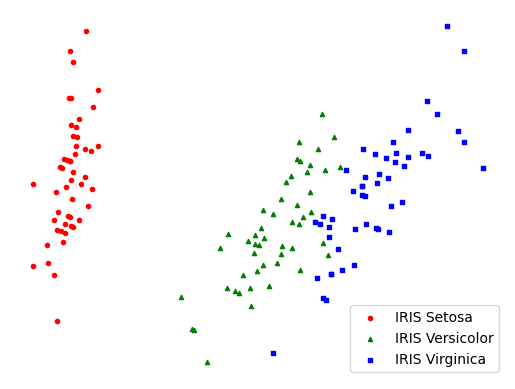

In [6]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :4] # we take full 4 features
Y = iris.target
# Normalize data
X_norm = (X - X.min())/(X.max() - X.min())
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))
plt.axis("off")
plt.scatter(transformed[Y==0][0], transformed[Y==0][1], s=9, label='IRIS Setosa',
c='red')
plt.scatter(transformed[Y==1][0], transformed[Y==1][1], s=9, label='IRIS Versicolor',
c='green', marker="^")
plt.scatter(transformed[Y==2][0], transformed[Y==2][1], s=9, label='IRIS Virginica',
c='blue', marker="s")
plt.legend()
plt.show()

In [7]:
one_col = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one_col, X), axis=1)
print(Xbar.shape)
print(Xbar)

(150, 5)
[[1.  5.1 3.5 1.4 0.2]
 [1.  4.9 3.  1.4 0.2]
 [1.  4.7 3.2 1.3 0.2]
 [1.  4.6 3.1 1.5 0.2]
 [1.  5.  3.6 1.4 0.2]
 [1.  5.4 3.9 1.7 0.4]
 [1.  4.6 3.4 1.4 0.3]
 [1.  5.  3.4 1.5 0.2]
 [1.  4.4 2.9 1.4 0.2]
 [1.  4.9 3.1 1.5 0.1]
 [1.  5.4 3.7 1.5 0.2]
 [1.  4.8 3.4 1.6 0.2]
 [1.  4.8 3.  1.4 0.1]
 [1.  4.3 3.  1.1 0.1]
 [1.  5.8 4.  1.2 0.2]
 [1.  5.7 4.4 1.5 0.4]
 [1.  5.4 3.9 1.3 0.4]
 [1.  5.1 3.5 1.4 0.3]
 [1.  5.7 3.8 1.7 0.3]
 [1.  5.1 3.8 1.5 0.3]
 [1.  5.4 3.4 1.7 0.2]
 [1.  5.1 3.7 1.5 0.4]
 [1.  4.6 3.6 1.  0.2]
 [1.  5.1 3.3 1.7 0.5]
 [1.  4.8 3.4 1.9 0.2]
 [1.  5.  3.  1.6 0.2]
 [1.  5.  3.4 1.6 0.4]
 [1.  5.2 3.5 1.5 0.2]
 [1.  5.2 3.4 1.4 0.2]
 [1.  4.7 3.2 1.6 0.2]
 [1.  4.8 3.1 1.6 0.2]
 [1.  5.4 3.4 1.5 0.4]
 [1.  5.2 4.1 1.5 0.1]
 [1.  5.5 4.2 1.4 0.2]
 [1.  4.9 3.1 1.5 0.2]
 [1.  5.  3.2 1.2 0.2]
 [1.  5.5 3.5 1.3 0.2]
 [1.  4.9 3.6 1.4 0.1]
 [1.  4.4 3.  1.3 0.2]
 [1.  5.1 3.4 1.5 0.2]
 [1.  5.  3.5 1.3 0.3]
 [1.  4.5 2.3 1.3 0.3]
 [1.  4.4 3.2 1.3 0.2]
 [

In [8]:
# devide data into 2 part: train_data and test_data
X_train, X_test, Y_train, Y_test = train_test_split(Xbar, Y, train_size=0.8)
X_train = X_train.T
X_test = X_test.T

In [9]:
def convert_labels(y, C):
    Y = sparse.coo_matrix((np.ones_like(y),
                           (y, np.arange(len(y)))), shape= (C, len(y))).toarray()
    return Y

print(convert_labels(Y, 3))

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1]]


In [10]:
def softmax_stable(Z):
    e_Z = np.exp(Z - np.max(Z, axis=0, keepdims= True))
    A = e_Z / e_Z.sum(axis = 0)
    return A

def softmax(Z):
    e_Z = np.exp(Z)
    A = e_Z/e_Z.sum(axis = 0)
    return A

def softmax_regression(X, y, W_init, eta, tol = 1e-4, max_count = 10000): 
    W = [W_init]     
    C = W_init.shape[1] 
    Y = convert_labels(y, C) 
    it = 0 
    N = X.shape[1] 
    d = X.shape[0] 

    count = 0 
    check_w_after = N
    while count < max_count: 
        # mix data  
        mix_id = np.random.permutation(N) 
        for i in mix_id: 
            xi = X[:, i].reshape(d, 1) 
            yi = Y[:, i].reshape(C, 1) 
            ai = softmax(np.dot(W[-1].T, xi)) 
            W_new = W[-1] + eta*xi.dot((yi - ai).T) 
            count += 1 
            # stopping criteria 
            if count%check_w_after == 0:                 
                if np.linalg.norm(W_new - W[-check_w_after]) < tol: 
                    return W 
            W.append(W_new) 

    return W  

def cost(X, Y, W):
    A = softmax(W.T.dot(X))
    return -np.sum(Y*np.log(A))

def pred(W, X):
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis=0)

In [11]:
eta = .05
d = X_train.shape[0]
w_init = np.random.randn(X_train.shape[0], 3)
w = softmax_regression(X_train, Y_train, w_init, eta)
print(w[-1])
pred1 = pred(w[-1], X_test)
print(pred1)
print(X_train.shape, Y_train.shape, w_init.shape)

[[ 1.64370155  0.79839221 -3.87873707]
 [ 1.34246687  1.39362414 -3.70921862]
 [ 3.11552258 -0.22860369 -4.80503934]
 [-4.80050507 -0.25252491  6.59819122]
 [-0.91257382 -2.18138414  6.82449218]]
[1 2 2 1 2 1 0 2 1 2 2 1 0 2 0 1 1 1 1 1 1 0 0 2 1 2 2 2 1 2]
(5, 120) (120,) (5, 3)


In [12]:
from sklearn.linear_model import LogisticRegression
lorg=LogisticRegression(multi_class='multinomial',solver='sag', max_iter=5000)
print(X_train)
lorg.fit(X_train.T,Y_train)
Y_pred=lorg.predict(X_test.T)
print(Y_pred)

[[1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]
 [5.8 6.  5.  5.  6.8 4.9 5.7 4.8 5.5 6.3 5.6 6.7 5.6 4.6 6.5 5.  5.7 4.8
  6.9 6.3 6.2 6.7 5.5 7.7 4.9 6.8 6.4 6.6 4.9 5.2 5.1 4.5 7.2 4.8 6.8 5.8
  5.7 6.7 6.  6.3 6.4 7.9 6.1 5.1 5.5 5.5 6.5 6.4 6.7 5.7 4.4 5.1 5.4 6.7
  4.4 4.9 6.3 7.7 6.7 4.7 6.4 6.9 5.6 5.6 5.  5.1 5.7 7.6 6.  6.3 6.2 6.
  4.9 5.1 5.1 4.6 4.9 5.9 4.7 5.4 5.  6.1 7.2 5.2 5.3 5.  4.8 6.9 7.3 5.7
  4.4 4.3 6.3 5.6 6.5 5.4 5.  7.1 6.  5.4 6.3 7.2 5.9 6.4 5.2 5.5 5.8 6.9
  6.2 6.7 5.  5.2 5.1 5.7 5.  5.7 6.1 4.8 4.6 7. ]
 [2.6 2.2 3.  3.4

In [13]:
from sklearn.metrics import accuracy_score 
print(accuracy_score(Y_test,Y_pred)) 
 
# for confusion matrix 
from sklearn.metrics import confusion_matrix 
cm=confusion_matrix(Y_test,Y_pred) 
print(cm) 

0.9333333333333333
[[ 5  0  0]
 [ 0 11  2]
 [ 0  0 12]]


## Ví dụ 3: 

In [1]:
from sklearn.datasets import fetch_20newsgroups_vectorized
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from scipy import sparse

In [2]:
n_samples = 20000

X, y = fetch_20newsgroups_vectorized(subset ='all', return_X_y=True)
X = X[:n_samples]
y = y[:n_samples]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify=y, test_size=0.25)

train_samples, n_features = X_train.shape
n_classes = np.unique(y).shape[0]

In [3]:
def convert_labels(y, C):
    Y = sparse.coo_matrix((np.ones_like(y),
                           (y, np.arange(len(y)))), shape= (C, len(y))).toarray()
    return Y

print(convert_labels(y, n_classes))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]


In [4]:
def softmax_stable(Z):
    Z.float()
    e_Z = np.exp(Z - np.max(Z, axis=0, keepdims= True))
    A = e_Z / e_Z.sum(axis = 0)
    return A

def softmax(Z):
    Z.float()
    e_Z = np.exp(Z)
    A = e_Z/e_Z.sum(axis = 0)
    return A

def softmax_regression(X, y, W_init, eta, tol = 1e-4, max_count = 10000): 
    W = [W_init]     
    C = W_init.shape[1] 
    Y = convert_labels(y, C) 
    it = 0 
    N = X.shape[1] 
    d = X.shape[0] 

    count = 0 
    check_w_after = N
    while count < max_count: 
        # mix data  
        mix_id = np.random.permutation(N) 
        for i in mix_id: 
            xi = X[:, i].reshape(d, 1) 
            yi = Y[:, i].reshape(C, 1) 
            ai = softmax(np.dot(W[-1].T, xi)) 
            W_new = W[-1] + eta*xi.dot((yi - ai).T) 
            count += 1 
            # stopping criteria 
            if count%check_w_after == 0:                 
                if np.linalg.norm(W_new - W[-check_w_after]) < tol: 
                    return W 
            W.append(W_new) 

    return W  

def cost(X, Y, W):
    A = softmax(W.T.dot(X))
    return -np.sum(Y*np.log(A))

def pred(W, X):
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis=0)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
model = LogisticRegression()
model.fit(X_train, y_train)
model.predict(X_test)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([ 0, 12, 15, ..., 13, 11, 12])

In [6]:
conmatrix = confusion_matrix(model.predict(X_test), y_test)
print(conmatrix)

[[156   0   0   0   0   0   0   0   0   2   0   1   0   1   1   4   2   0
    6  15]
 [  1 186   8   5   4  12   1   1   0   1   1   3  10   6   3   4   2   0
    0   1]
 [  0   4 191  15   5  14   0   0   0   0   0   0   1   0   0   0   0   0
    1   0]
 [  0   5  19 181  15   4  11   0   0   1   0   1   9   1   0   0   0   0
    0   1]
 [  0  10   5  15 196   5   1   1   1   1   0   2   6   2   1   2   1   0
    0   1]
 [  0  11   5   2   3 200   2   0   0   2   0   4   1   1   2   3   1   1
    0   1]
 [  1   3   6   9   7   0 206   7   7   3   5   3   5   3   6   0   0   0
    3   1]
 [  0   1   0   2   0   1   8 221  12   1   1   1   8   5   0   0   1   1
    2   2]
 [  2   0   1   1   1   1   1   4 216   0   0   2   2   3   0   0   2   3
    1   2]
 [  4   1   0   0   0   1   3   2   2 220  14   3   1   1   2   0   3   3
    4   5]
 [  0   0   0   0   0   0   1   0   1   9 228   1   0   1   1   1   0   0
    2   1]
 [  1   2   2   1   0   0   1   0   0   0   0 213   2   1   0   0

In [7]:
print(accuracy_score(model.predict(X_test), y_test))

0.8160016977928692


## Ví dụ 4:

In [25]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy import sparse
from sklearn.metrics import confusion_matrix, accuracy_score

np.random.seed(2)

In [26]:
# load data
file_data = "glass.csv"

glass_df = pd.read_csv(file_data)
# print(glass_df.info())

glass_types = glass_df['Type'].unique()
# print(glass_types)
# print(glass_df['Type'].value_counts())

del glass_df['Id_Number']
X_1 = glass_df[glass_df.columns[:-1]]
X_1 = np.asarray(X_1)
y_1 = glass_df['Type']
y_1= np.asarray(y_1)


In [27]:
# devide data into data_train and data_test
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.25)
X_train = X_train.T
X_test = X_test.T

In [28]:
# Xbar_train and Xbar_test
one_col_train = np.ones((1, X_train.shape[1]))
Xbar_train = np.concatenate((one_col_train, X_train), axis=0)

one_col_test = np.ones((1, X_test.shape[1]))
Xbar_test = np.concatenate((one_col_test, X_test), axis= 0)
print(Xbar_train.shape)
print(y_train.shape)


(10, 160)
(160,)


In [29]:
def convert_labels(y, C):
    Y = sparse.coo_matrix((np.ones_like(y),
                           (y, np.arange(len(y)))), shape= (C, len(y))).toarray()
    print(type(Y))
    return Y

print(convert_labels(y_1, 8)[0])

<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [30]:
def softmax_stable(Z):
    e_Z = np.exp(Z - np.max(Z, axis=0, keepdims= True))
    A = e_Z / e_Z.sum(axis = 0)
    return A

def softmax(Z):
    e_Z = np.exp(Z)
    A = e_Z/e_Z.sum(axis = 0)
    return A

def softmax_regression(X, y, W_init, eta, tol = 1e-4, max_count = 10000): 
    W = [W_init]     
    C = W_init.shape[1] 
    Y = convert_labels(y, C) 
    it = 0 
    N = X.shape[1] 
    d = X.shape[0] 

    count = 0 
    check_w_after = N
    while count < max_count: 
        # mix data  
        mix_id = np.random.permutation(N) 
        for i in mix_id: 
            xi = X[:, i].reshape(d, 1) 
            yi = Y[:, i].reshape(C, 1) 
            ai = softmax(np.dot(W[-1].T, xi)) 
            W_new = W[-1] + eta*xi.dot((yi - ai).T) 
            count += 1 
            # stopping criteria 
            if count%check_w_after == 0:                 
                if np.linalg.norm(W_new - W[-check_w_after]) < tol: 
                    return W 
            W.append(W_new) 

    return W  

def cost(X, Y, W):
    A = softmax(W.T.dot(X))
    return -np.sum(Y*np.log(A))

def pred(W, X):
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis=0)

In [31]:
eta = .05
d = Xbar_train.shape[0]
w_init = np.random.randn(Xbar_train.shape[0], 8)
w = softmax_regression(Xbar_train, y_train, w_init, eta)
pred = pred(w[-1], Xbar_test)
print(pred)
cmmodel = confusion_matrix(y_test, pred)
print(cmmodel)
print(accuracy_score(y_test, pred))

<class 'numpy.ndarray'>
[1 1 7 1 1 7 1 7 1 1 1 1 1 1 1 1 1 1 1 7 2 1 1 1 7 7 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 7 1 7 1 1 1 1 1 1 2 1 1]
[[22  0  0  0  0  0]
 [14  0  0  0  0  1]
 [ 3  0  0  0  0  0]
 [ 2  1  0  0  0  0]
 [ 1  0  0  0  0  1]
 [ 2  1  0  0  0  6]]
0.5185185185185185


In [32]:
from sklearn.linear_model import LogisticRegression
mulLog = LogisticRegression()
mulLog.fit(Xbar_train.T, y_train.T)
pred1 = mulLog.predict(Xbar_test.T)
print(pred1)
cm = confusion_matrix(y_test, pred1)
print(cm)
print(accuracy_score(y_test, pred1))

[2 2 7 2 1 2 1 7 2 2 2 2 2 1 2 2 1 2 2 7 5 1 2 2 7 7 2 2 2 1 2 7 2 2 1 2 2
 2 2 1 2 2 6 2 7 2 2 2 2 2 2 2 2 2]
[[ 5 17  0  0  0  0]
 [ 3 12  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  1  0  0  1  0]
 [ 0  1  0  1  0  7]]
0.46296296296296297


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Ví dụ 5: 

In [8]:
import os
import numpy as np

In [10]:
data_path = "C:/Users/Admin/ML"
train_images_path = os.path.join(data_path, "train-images-idx3-ubyte.gz")
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')

test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz') 
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz') 

In [11]:
def get_mnist_data(images_path, labels_path, num_images 
                   , shuffle=False, _is=True, image_size=28): 
    """ 
        This shuffle param is active when .gz is downloaded at: 
            - 'http://yann.lecun.com/exdb/mnist/' 
            - This function return random num_images in 60000 or 10000   
    """ 
    # read data 
    import gzip           # to decompress gz (zip) file 
 
    # open file training to read training data 
    f_images = gzip.open(images_path,'r') 
     
    # skip 16 first bytes because these are not data, only header infor 
    f_images.read(16) 
     
    # general: read num_images data samples if this parameter is set; 
    # if not, read all (60000 training or 10000 test) 
    real_num = num_images if not shuffle else (60000 if _is else 10000) 
 
    # read all data to buf_images (28x28xreal_num) 
    buf_images = f_images.read(image_size * image_size * real_num) 
     
    # images 
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32) 
    images = images.reshape(real_num, image_size, image_size,) 
     
    # Read labels    
    f_labels = gzip.open(labels_path,'r') 
    f_labels.read(8) 
     
    labels = np.zeros((real_num)).astype(np.int64) 
     
    # rearrange to correspond the images and labels 
    for i in range(0, real_num):    
        buf_labels = f_labels.read(1) 
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64) 
     
    # shuffle to get random images data 
    if shuffle is True: 
        rand_id = np.random.randint(real_num, size=num_images) 
         
        images = images[rand_id, :] 
        labels = labels[rand_id,] 
     
    # change images data to type of vector 28x28 dimentional 
    images = images.reshape(num_images, image_size * image_size) 
    return images, labels

In [12]:
train_images, train_labels = get_mnist_data(train_images_path, train_labels_path, 5000, shuffle=True) 
 
test_images, test_labels = get_mnist_data( 
    test_images_path, test_labels_path, 10000, _is=False, shuffle=True) 
 
print(train_images.shape, train_labels.shape) 
print(test_images.shape, test_labels.shape)

(5000, 784) (5000,)
(10000, 784) (10000,)


In [13]:
# Convert matrix to image 
def get_image(image): 
    return image.reshape(28, 28) 
 
# These methods are from Vi du 1 
def convert_labels(y, C): 
    from scipy import sparse  
    Y = sparse.coo_matrix((np.ones_like(y),  
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray() 
    return Y  
 
def softmax(Z): 
    e_Z = np.exp(Z) 
    A = e_Z / e_Z.sum(axis = 0) 
    return A 
 
def softmax_stable(Z): 
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True)) 
    A = e_Z / e_Z.sum(axis = 0) 
    return A 
 
def pred(W, X): 
    A = softmax_stable(W.T.dot(X)) 
    return np.argmax(A, axis = 0)

In [14]:
def _softmax_regression(X, Y, theta, lambda_=0.5, 
                       iterations=20, learning_rate=1e-5, batch_size=200): 
    from sklearn.metrics import log_loss 
     
    losses = [] 
    _theta = theta 
    d, N = X.shape 
     
    for iter_ in range(iterations): 
        shuffle_index = np.random.permutation(N) 
        for i in shuffle_index: 
            xi = X[:, i].reshape(d, 1) 
            yi = Y[:, i].reshape(10, 1) 
            ai = softmax_stable(np.dot(_theta.T, xi)) 
            _theta += learning_rate * xi.dot((yi - ai).T) 
            if (iter_ * N + i) % batch_size == 0: 
                Y_hat = np.dot(_theta.T, X) 
                losses.append(log_loss(Y, Y_hat)) 
                 
        Y_hat = np.dot(_theta.T, X) 
        print(f"epoch {iter_} - cost {log_loss(Y, Y_hat) / N}") 
                 
    return _theta, losses


6 1


<Figure size 640x480 with 0 Axes>

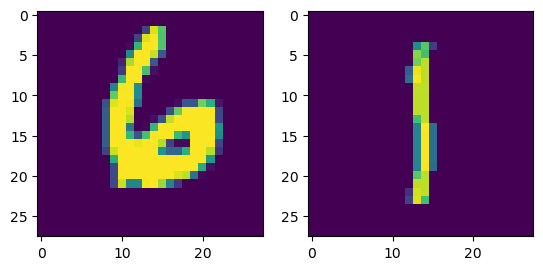

In [15]:
# for display and test digit :D  
import random 
import matplotlib.pyplot as plt 
 
index = random.randint(0, 1000) 
print(train_labels[index], test_labels[index]) 
 
 
train_image = np.asarray(get_image(train_images[index])).squeeze() 
test_image = np.asarray(get_image(test_images[index])).squeeze() 
 
plt.figure() 
 
#subplot(r,c) provide the no. of rows and columns 
f, axarr = plt.subplots(1, 2)  
 
# use the created array to output your multiple images. In this case I have stacked 4 images vertically 
axarr[0].imshow(train_image) 
axarr[1].imshow(test_image) 
plt.show()

(785, 5000)
(10, 5000)


<Figure size 640x480 with 0 Axes>

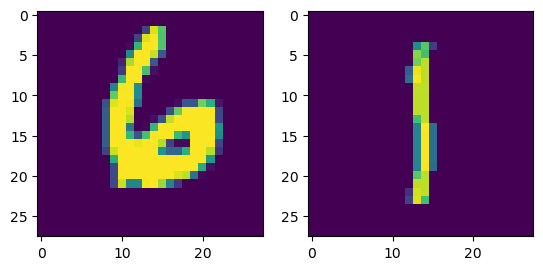

In [16]:
X_train = np.concatenate((np.ones((1, train_images.shape[0])), train_images.T),  
         axis = 0) 
Y_train = convert_labels(train_labels, 10) 
print(X_train.shape) 
print(Y_train.shape) 
 
train_image = np.asarray(get_image(train_images[index])).squeeze() 
test_image = np.asarray(get_image(test_images[index])).squeeze() 
 
plt.figure() 
 
#subplot(r,c) provide the no. of rows and columns 
f, axarr = plt.subplots(1, 2)  
 
# use the created array to output your multiple images. In this case I have stacked 4 images vertically 
axarr[0].imshow(train_image) 
axarr[1].imshow(test_image) 
plt.show()

In [17]:
theta = np.zeros((X_train.shape[0], 10)) 
 
opt_theta, losses = _softmax_regression(X_train, Y_train, theta) 
print('training success: ', opt_theta.shape, len(losses))

epoch 0 - cost 0.7915814968272871
epoch 1 - cost 0.7878918391956345
epoch 2 - cost 0.7793606137529732
epoch 3 - cost 0.775479715910927
epoch 4 - cost 0.780118454710948
epoch 5 - cost 0.7739604276423936
epoch 6 - cost 0.7762696866530974
epoch 7 - cost 0.7768203927491449
epoch 8 - cost 0.778765512418965
epoch 9 - cost 0.7774408927816305
epoch 10 - cost 0.7775239384304184
epoch 11 - cost 0.7766878760498427
epoch 12 - cost 0.7769872460652401
epoch 13 - cost 0.7767876747269901
epoch 14 - cost 0.7760979158797634
epoch 15 - cost 0.7792057944641879
epoch 16 - cost 0.7754552540943062
epoch 17 - cost 0.7767595714721778
epoch 18 - cost 0.7778281671252989
epoch 19 - cost 0.7768594946505013
training success:  (785, 10) 500


In [18]:
from sklearn.metrics import accuracy_score 
print('accuracy training data: ', accuracy_score(train_labels,  
      pred(opt_theta, X_train))) 
 
# test_images, test_labels = get_mnist_data( 
#     test_images_path, test_labels_path, 1000, _is=False, shuffle=False) 
 
X_test = np.concatenate((np.ones((1, test_images.shape[0])), test_images.T),  
         axis = 0) 
print(X_test.shape) 
print('accuracy testing data: ', accuracy_score(test_labels,  
       pred(opt_theta, X_test)))

accuracy training data:  0.9328
(785, 10000)
accuracy testing data:  0.864


In [19]:
print(len(train_labels))
print(train_labels)
print(X_train)
print(X_train.shape)

5000
[6 7 8 ... 7 1 9]
[[1. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(785, 5000)


In [20]:
from sklearn.decomposition import PCA as sklearnPCA
import pandas as pd

pca = sklearnPCA(n_components=2)
transformed = pd.DataFrame(pca.fit_transform(X_train.T))
print(transformed)


                0           1
0     1407.883917    8.820398
1     -683.078557 -242.795165
2     -437.079919  433.563617
3     -920.815609  703.354040
4     -208.583973 -761.147109
...           ...         ...
4995   157.801261 -872.661973
4996  -789.490671  156.627436
4997  -849.843742  387.609940
4998  -937.902405  437.513968
4999   505.745073  149.505317

[5000 rows x 2 columns]


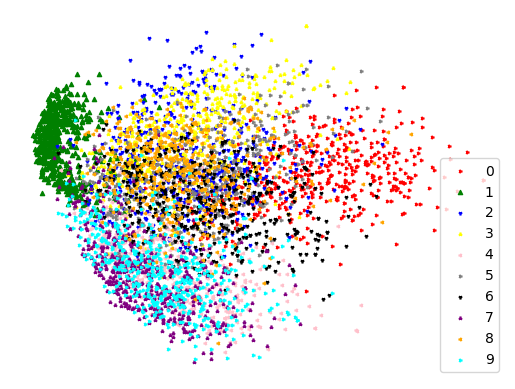

In [21]:
plt.axis("off") 
 
plt.scatter(transformed[train_labels==0][0], transformed[train_labels==0][1], s=9, label='0', 
c='red', marker="4") 
plt.scatter(transformed[train_labels==1][0], transformed[train_labels==1][1], s=9, label='1', 
c='green', marker="^")

plt.scatter(transformed[train_labels==2][0], transformed[train_labels==2][1], s=9, label='2', 
c='blue', marker="1")

plt.scatter(transformed[train_labels==3][0], transformed[train_labels==3][1], s=9, label='3', 
c='yellow', marker="2") 

plt.scatter(transformed[train_labels==4][0], transformed[train_labels==4][1], s=9, label='4', 
c='pink', marker="3") 

plt.scatter(transformed[train_labels==5][0], transformed[train_labels==5][1], s=9, label='5', 
c='gray', marker="4") 

plt.scatter(transformed[train_labels==6][0], transformed[train_labels==6][1], s=9, label='6', 
c='black', marker="1") 

plt.scatter(transformed[train_labels==7][0], transformed[train_labels==7][1], s=9, label='7', 
c='purple', marker="2") 

plt.scatter(transformed[train_labels==8][0], transformed[train_labels==8][1], s=9, label='8', 
c='orange', marker="3") 

plt.scatter(transformed[train_labels==9][0], transformed[train_labels==9][1], s=9, label='9', 
c='cyan', marker="4") 
 
plt.legend() 
 
plt.show()

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
# print(X_train.shape, Y_train.shape)
# print(X_train)
model = LogisticRegression(multi_class='multinomial',solver='sag', max_iter=5)
model.fit(X_train.T, train_labels)
model.predict(X_test.T)
acc = accuracy_score((model.predict(X_test.T)), test_labels)
print(acc)


0.8989


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [23]:
from sklearn.naive_bayes import MultinomialNB

mul = MultinomialNB()
mul.fit(X_train.T, train_labels)
mul.predict(X_test.T)
acc1 = accuracy_score((mul.predict(X_test.T)), test_labels)
print(acc1)

0.8407


In [24]:
import pandas as pd

d = {'build model': accuracy_score(test_labels,  
       pred(opt_theta, X_test)), 'LogisticRegression': acc, 'MultinomialNB': acc1}
conclusion = pd.Series(data=d, index=['build model', 'LogisticRegression', 'MultinomialNB'])
print(conclusion)

build model           0.8640
LogisticRegression    0.8989
MultinomialNB         0.8407
dtype: float64
